In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
from math import exp

In [2]:
###################################### PART A ###############################

## (i): Intial weights listed below
initial_weights = [0.5, 0.2]
    
# (ii): Learning rate constant
learning_rate = 0.02
    
# (iii): Number of updates to the weight vector
num_updates = 1000
    
# (iv): Final solution vector
final_df = None

# (v): The quality of our solution
solution_quality = 0

In [3]:
# Helper function to normalize data
def normalize(X):
    return X - X.mean()

# Method to make predictions (sigmoid function, gets applied to every element of X)
def predict(X, b0, b1):
    return np.array([ 1 / (1 + exp(-1*b0 + -1*b1*x)) for x in X])

# Used to train our model
def logistic_regression(X, Y):

    X = normalize(X)

    b0 = initial_weights[0]
    b1 = initial_weights[1]
    L  = learning_rate
    iters = num_updates

    for _ in range(iters):
        y_pred = predict(X, b0, b1)
        D_b0 = -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b0
        D_b1 = -2 * sum(X * (Y - y_pred) * y_pred * (1 - y_pred))  # Derivative of loss wrt b1
        # Update b0 and b1
        b0 = b0 - L * D_b0
        b1 = b1 - L * D_b1
    
    return b0, b1

In [9]:
# Data given to us in the project.
tr_set = {'X': [1, 2, 3, 4, 5, 6, 7, 8],
          'Y': [0, 1, 0, 1, 0, 1, 1, 1]}

df = pd.DataFrame(tr_set, columns = ['X', 'Y'])

# Training the model
b0, b1 = logistic_regression(df["X"], df["Y"])

# Making predictions
X_test_norm = normalize(df["X"])
y_pred = predict(X_test_norm, b0, b1)

df = pd.DataFrame()

# Getting the final soulution vector
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

trained_set = {'X': [1, 2, 3, 4, 5, 6, 7, 8],
               'y_pred': y_pred}

final_df = pd.DataFrame(trained_set, columns = ['X', 'y_pred'])

# Getting solution quality
solution_quality = 0
for i in range(len(y_pred)):
    if y_pred[i] == tr_set["Y"][i]:
        solution_quality += 1
        
solution_quality = solution_quality/ len(y_pred)

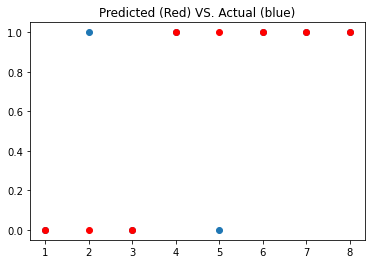

The initial weights were:  [0.5, 0.2]
The learning rate used was:  0.02
The number of updates to the weight vector was:  1000
Final predicted solutions:
    X  y_pred
0  1       0
1  2       0
2  3       0
3  4       1
4  5       1
5  6       1
6  7       1
7  8       1
The solution quality of this answer is:  0.75
By solution quality we are talking about the number of 'Missclassified' points
basically if the predicted value does not match the actual 'y' value it is 'Missclassified.' 


In [13]:
###################################### SUMMARY PART A ###############################

plt.scatter(tr_set["X"], tr_set["Y"])                   # Blue dots
plt.scatter(tr_set["X"], y_pred, c="red")               # Red dots are trained.

plt.title(label="Predicted (Red) VS. Actual (blue)")
plt.show()

## (i):
print("The initial weights were: ", initial_weights)
    
# (ii):
print("The learning rate used was: ", learning_rate)
    
# (iii):
print("The number of updates to the weight vector was: ", num_updates)
    
# (iv):
print("Final predicted solutions:\n", final_df)

# (v):
print("The solution quality of this answer is: ", solution_quality)
print("By solution quality we are talking about the number of 'Missclassified' points\nbasically if the predicted value does not match the actual 'y' value it is 'Missclassified.' ")
